# Prueba Data Science (uDA)

In [1]:
import pandas as pd

data = pd.read_csv("other_markets_brasil_properati_properati-BR-2016-11-01-properties-sell.csv")
data[["delete1","country", "province", "city", "neighbourhood", "delete2", "delete3"]] = data.place_with_parent_names.str.split(pat='|', expand=True)
data.drop(["delete1", "delete2", "delete3", "place_with_parent_names", "image_thumbnail"], axis=1, inplace=True)

#Selección de la ciudad de Sao Paulo
df_saopaulo = data[data.city == "São Paulo"]

#Eliminar de memoria 'data' para liberar el espacio del dataframe inicial que no se volverá a utilizar.
del data

#Número de missing values
df_saopaulo.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
geonames_id                   296357
lat-lon                       170846
lat                           170846
lon                           170846
price                          19264
currency                       19272
price_aprox_local_currency     19264
price_aprox_usd                19264
surface_total_in_m2           225309
surface_covered_in_m2          62971
price_usd_per_m2               77729
price_per_m2                   77729
floor                         282469
rooms                          97268
expenses                      175540
properati_url                      0
description                        0
title                              0
country                            0
province                           0
city                               0
neighbourhood                      0
dtype: int64

In [2]:
#Tipos de datos
df_saopaulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296357 entries, 63 to 872671
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  296357 non-null  object 
 1   operation                   296357 non-null  object 
 2   property_type               296357 non-null  object 
 3   place_name                  296357 non-null  object 
 4   geonames_id                 0 non-null       float64
 5   lat-lon                     125511 non-null  object 
 6   lat                         125511 non-null  float64
 7   lon                         125511 non-null  float64
 8   price                       277093 non-null  float64
 9   currency                    277085 non-null  object 
 10  price_aprox_local_currency  277093 non-null  float64
 11  price_aprox_usd             277093 non-null  float64
 12  surface_total_in_m2         71048 non-null   float64
 13  surface_cover

In [3]:
import numpy as np

#Para evitar problemas de correlación se deja solo los precios en dólares USD ($)
df_saopaulo.drop(["price", "currency", "price_aprox_local_currency", "price_per_m2"], axis=1, inplace=True)
#Eliminar columna vacía
df_saopaulo.drop("geonames_id", axis=1, inplace=True)

#La columna de gastos se considerará que es 0 cuando no se indique nada. Los datos se dejan en moneda BRS
#Al igual que esto, se considerará como planta 0 cuando no se indica nada.
df_saopaulo.expenses = df_saopaulo.expenses.fillna(0)
df_saopaulo.floor = df_saopaulo.floor.fillna(0)

#En cuanto a las habitaciones en las cuales no se especifican, se utilizará la mediana.
print(np.median(df_saopaulo.rooms.dropna()))
df_saopaulo.rooms = df_saopaulo.rooms.fillna(np.median(df_saopaulo.rooms.dropna()))
df_saopaulo= df_saopaulo.dropna(subset=["price_aprox_usd"])

df_saopaulo.isnull().sum()

2.0


created_on                    0
operation                     0
property_type                 0
place_name                    0
lat-lon                  158804
lat                      158804
lon                      158804
price_aprox_usd               0
surface_total_in_m2      210849
surface_covered_in_m2     56750
price_usd_per_m2          58465
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
country                       0
province                      0
city                          0
neighbourhood                 0
dtype: int64

In [4]:
print("El número de columnas en 'df_saopaulo_with_latlon' es de: ", len(df_saopaulo))

El número de columnas en 'df_saopaulo_with_latlon' es de:  277093


## Visualización de las que contienen latitud y longitud.

In [5]:
import numpy as np

# 1. En este caso se dejarán solo las que tengan latitud / longitud negativa para poder representar los datos de manera visual sobre las coordenadas de latitud y longitud

df_saopaulo_with_latlon = df_saopaulo.dropna(subset=["lat","lon"])
df_saopaulo_with_latlon.describe()


lat            lon  price_aprox_usd  surface_total_in_m2  \
count  118289.000000  118289.000000     1.182890e+05         27281.000000   
mean      -23.560729     -46.620566     4.169922e+05           257.353030   
std         0.578170       1.107938     6.186442e+05          2751.437191   
min       -26.803980    -110.900421     0.000000e+00             0.000000   
25%       -23.614347     -46.690937     1.603944e+05            31.000000   
50%       -23.584340     -46.665781     2.590027e+05           111.000000   
75%       -23.546650     -46.626960     4.649566e+05           210.000000   
max        27.913132       0.002000     4.992823e+07        161957.000000   

       surface_covered_in_m2  price_usd_per_m2          floor          rooms  \
count          110541.000000      1.091190e+05  118289.000000  118289.000000   
mean              163.875910      3.333362e+03       0.408339       2.490206   
std               491.865319      4.882607e+04       2.461846       2.289824   
min                 0.000000      3.919243e+00       0.000000       1.000000   
25%                70.000000      1.779241e+03       0.000000       2.000000   
50%               113.000000      2.451833e+03       0.000000       2.000000   
75%               185.000000      3.204852e+03       0.000000       2.000000   
max             64738.000000      9.361543e+06     266.000000      36.000000   

           expenses  
count  1.182890e+05  
mean   1.292886e+03  
std    4.054047e+04  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    8.400000e+02  
max    6.100000e+06

In [6]:
#1.1 Tratando con los outliers
n = len(df_saopaulo_with_latlon)
print("El número de columnas en 'df_saopaulo_with_latlon' es de: ", n)
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.surface_covered_in_m2 > 40) & (df_saopaulo_with_latlon.surface_covered_in_m2 < 500)]
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.lat > -24) & (df_saopaulo_with_latlon.lat < -23.2)]
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.lon > -47.2) & (df_saopaulo_with_latlon.lon < -45.8)]
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.price_aprox_usd >= 1000) & (df_saopaulo_with_latlon.price_aprox_usd < 1000000)]
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.surface_total_in_m2 >= 40)]
df_saopaulo_with_latlon = df_saopaulo_with_latlon[(df_saopaulo_with_latlon.price_usd_per_m2 >= 500) & (df_saopaulo_with_latlon.price_usd_per_m2 <= 6000)]

print("El número de columnas en 'df_saopaulo_with_latlon' despues de filtrar es de: ", len(df_saopaulo_with_latlon))

print("Por lo tanto nos quedamos con el : ", len(df_saopaulo_with_latlon)/ n * 100, "%")


El número de columnas en 'df_saopaulo_with_latlon' es de:  118289
El número de columnas en 'df_saopaulo_with_latlon' despues de filtrar es de:  13799
Por lo tanto nos quedamos con el :  11.665497214449356 %


Visualización del precio en USD del metro cuadrado.

<Figure size 1080x720 with 0 Axes>

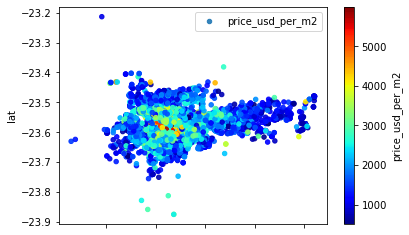

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

df_saopaulo_with_latlon.plot(kind='scatter', x='lon', y='lat', label='price_usd_per_m2', c='price_usd_per_m2',
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.9, zorder=5)

plt.legend()
plt.show()

Visualización incluyendo los distritos de fondo mediante el archivo complementario en geojson.

<Figure size 1440x1152 with 0 Axes>

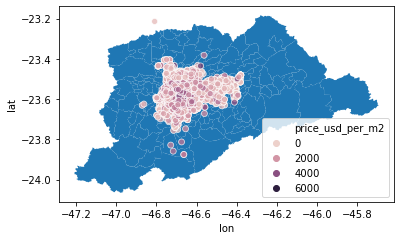

In [8]:
import geopandas as gpd
import seaborn as sns
neigh_map =  gpd.read_file('sao_paulo_neighbourhoods.geojson')

plt.figure(figsize=(20,16))
neigh_map.plot()

ax=plt.gca()

sns.scatterplot(x="lon", y="lat", data=df_saopaulo_with_latlon,  hue='price_usd_per_m2', legend = "brief",  ax=ax, alpha=0.8, cmap=plt.get_cmap('jet'))
plt.legend(loc=4)
plt.savefig("potato")
plt.show()

In [9]:
df_saopaulo_with_latlon.describe()

lat           lon  price_aprox_usd  surface_total_in_m2  \
count  13799.000000  13799.000000     13799.000000         13799.000000   
mean     -23.572948    -46.670551    333006.066431           240.832669   
std        0.047021      0.050482    206034.414608           989.186641   
min      -23.875162    -46.870105     26497.690000            40.000000   
25%      -23.611040    -46.694940    181240.440000           100.000000   
50%      -23.563545    -46.676792    272108.840000           153.000000   
75%      -23.536078    -46.655331    436871.990000           240.000000   
max      -23.213583    -46.379544    998989.960000         66000.000000   

       surface_covered_in_m2  price_usd_per_m2         floor         rooms  \
count           13799.000000      13799.000000  13799.000000  13799.000000   
mean              133.749475       2550.564302      1.086021      4.252844   
std                77.978311        879.435045      4.271352      3.516149   
min                41.000000        502.680556      0.000000      1.000000   
25%                75.000000       1931.746905      0.000000      2.000000   
50%               112.000000       2529.570213      0.000000      2.000000   
75%               170.000000       3120.514187      0.000000      6.000000   
max               498.000000       5994.672105    266.000000     25.000000   

           expenses  
count  13799.000000  
mean      13.521704  
std      141.501218  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     3913.000000

#### Visualización de la densidad de número de ventas de inmuebles por zonas

In [10]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

m=folium.Map([-23.573069,-46.672458],zoom_start=11, tiles = "stamenterrain")
HeatMap(df_saopaulo_with_latlon[['lat','lon']], radius=5, gradient={0.1:'blue',0.3:'green',0.4:'yellow',0.6:'red'}).add_to(m)
display(m)

#### Visualización de la densidad del precio por metro cuadrado de inmuebles por zonas

In [11]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

m=folium.Map([-23.573069,-46.672458],zoom_start=12, tiles = "stamenterrain")
HeatMap(df_saopaulo_with_latlon[['lat','lon', 'price_usd_per_m2']].groupby(['lat', 'lon']).mean().reset_index().values.tolist(), radius=4, gradient={0.1:'purple',0.4:'blue',0.475:'yellow',0.5:'orange', 0.525:'maroon'}).add_to(m)
m.add_child(folium.ClickForMarker(popup='Potential Location'))
display(m)


# Exploración de datos (sin tener en cuenta longitud y latitud)

In [12]:
df_saopaulo_no_lat= df_saopaulo.drop(["lat-lon", "lat", "lon", "operation", "surface_total_in_m2", "properati_url", "country", "province", "city", "price_usd_per_m2", "place_name"], axis=1)

df_saopaulo_no_lat.isnull().sum()

created_on                   0
property_type                0
price_aprox_usd              0
surface_covered_in_m2    56750
floor                        0
rooms                        0
expenses                     0
description                  0
title                        0
neighbourhood                0
dtype: int64

In [13]:
df_saopaulo_no_lat.describe()

price_aprox_usd  surface_covered_in_m2         floor          rooms  \
count     2.770930e+05           2.203430e+05  277093.00000  277093.000000   
mean      3.731221e+05           1.669543e+02       0.41490       2.249054   
std       5.793526e+05           2.368166e+03       2.53989       1.706830   
min       0.000000e+00           0.000000e+00       0.00000       1.000000   
25%       1.404231e+05           6.800000e+01       0.00000       2.000000   
50%       2.277975e+05           1.070000e+02       0.00000       2.000000   
75%       4.056668e+05           1.800000e+02       0.00000       2.000000   
max       4.992823e+07           1.001030e+06     501.00000      36.000000   

           expenses  
count  2.770930e+05  
mean   1.123569e+03  
std    4.094326e+04  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    6.250000e+02  
max    8.337087e+06

[]

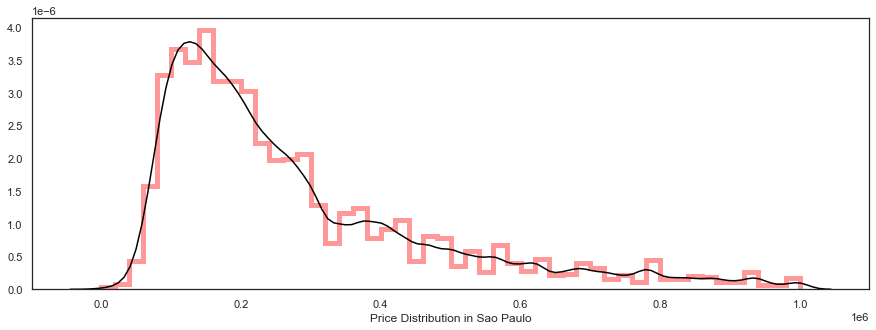

In [14]:
#Viendo como se distribuyen los precios totales

sns.set(style="white", palette="spring", color_codes=True)
plt.figure(figsize=(15, 5))
dist_plot = df_saopaulo[df_saopaulo["price_aprox_usd"] < 1000000]["price_aprox_usd"]
sns.distplot(dist_plot,color='r',axlabel ="Price Distribution in Sao Paulo",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 5});
plt.ioff()
plt.plot()

[]

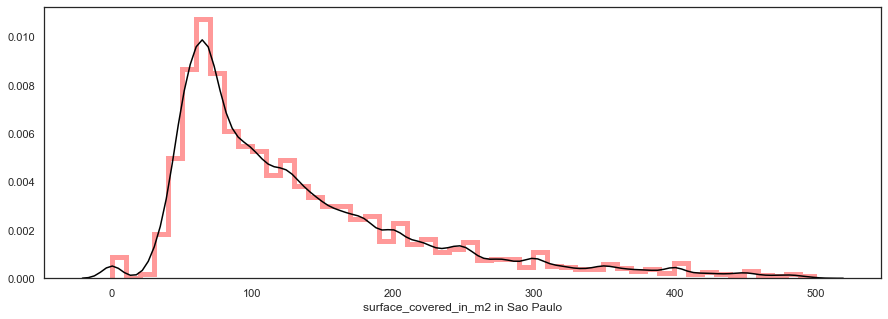

In [15]:
#Viendo como se distribuyen los precios del m2

sns.set(style="white", palette="spring", color_codes=True)
plt.figure(figsize=(15, 5))
dist_plot = df_saopaulo[df_saopaulo["surface_covered_in_m2"] < 500]["surface_covered_in_m2"]
sns.distplot(dist_plot,color='r',axlabel ="surface_covered_in_m2 in Sao Paulo",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 5});
plt.ioff()
plt.plot()

In [16]:
#1.1 Tratando con los outliers
n = len(df_saopaulo_no_lat)
print("El número de columnas en 'df_saopaulo_no_lat' es de: ", n)
df_saopaulo_no_lat = df_saopaulo_no_lat[(df_saopaulo_no_lat.surface_covered_in_m2 > 40) & (df_saopaulo_no_lat.surface_covered_in_m2 < 500)]
df_saopaulo_no_lat = df_saopaulo_no_lat[(df_saopaulo_no_lat.price_aprox_usd >= 10000) & (df_saopaulo_no_lat.price_aprox_usd < 1000000)]
df_saopaulo_no_lat = df_saopaulo_no_lat[df_saopaulo_no_lat.neighbourhood != ""]
print("El número de columnas en 'df_saopaulo_no_lat' despues de filtrar es de: ", len(df_saopaulo_no_lat))

print("Por lo tanto nos quedamos con el : ", len(df_saopaulo_no_lat)/ n * 100, "%")

El número de columnas en 'df_saopaulo_no_lat' es de:  277093
El número de columnas en 'df_saopaulo_no_lat' despues de filtrar es de:  189235
Por lo tanto nos quedamos con el :  68.29295579462492 %


In [17]:
df_saopaulo_no_lat.isnull().sum()

created_on               0
property_type            0
price_aprox_usd          0
surface_covered_in_m2    0
floor                    0
rooms                    0
expenses                 0
description              0
title                    0
neighbourhood            0
dtype: int64

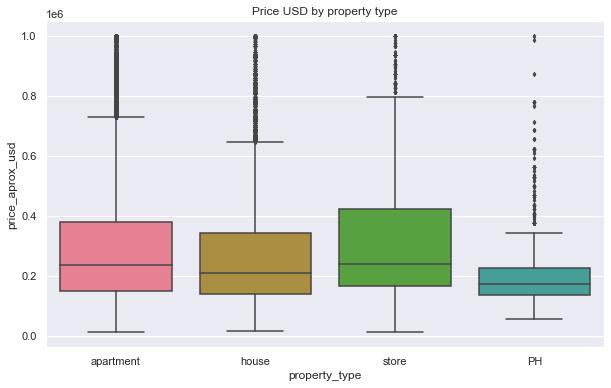

In [25]:
#Debido a que los outliers difieren bastante a niveles absolutos de la media de precios, para una mejor visualización se hará hasta 500$ de precio.

sns.set(palette="husl")
prop_type = df_saopaulo_no_lat[df_saopaulo_no_lat.price_aprox_usd < 1000000 ]
plt.figure(figsize=(10,6))
sns.boxplot(y="price_aprox_usd",x ='property_type' ,data = prop_type, fliersize=3)
plt.title("Price USD by property type")
plt.show()

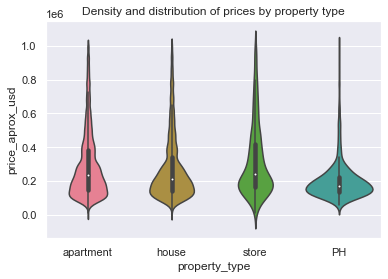

In [26]:
#En esta ocasión se utilizan un gráfico de violin para ver la distribución de los datos y la densidad.

sns.violinplot(data=prop_type, x='property_type', y='price_aprox_usd')
plt.title('Density and distribution of prices by property type')
plt.show()

In [20]:
#Gráfico interactivo con el precio medio de los barrios.

import plotly.express as px

nei_plot = df_saopaulo_no_lat[["price_aprox_usd", "neighbourhood"]].groupby(["neighbourhood"]).mean().sort_values("price_aprox_usd", ascending=False)
nei_plot.reset_index(inplace=True)
fig = px.scatter(nei_plot, x="neighbourhood", y="price_aprox_usd", color="price_aprox_usd")

fig.show()

 #### PARA INTENTAR LUEGO A VER SI MEJORA EL MODELO

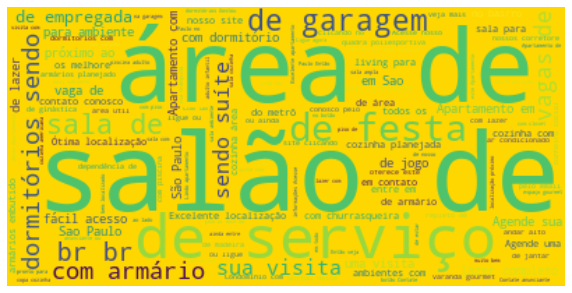

In [21]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

higher_price = df_saopaulo_no_lat[df_saopaulo_no_lat.price_aprox_usd > 100000]
text = " ".join(str(each) for each in higher_price.description)
stopwords= set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="gold").generate(text)
plt.figure(figsize=(10 ,6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

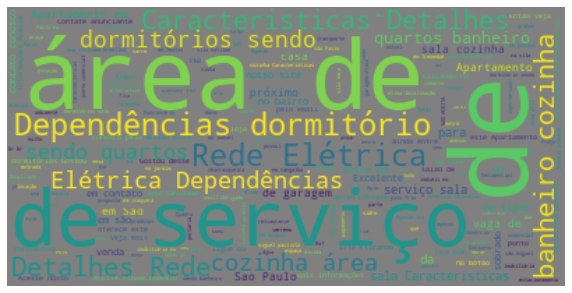

In [22]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

higher_price = df_saopaulo_no_lat[df_saopaulo_no_lat.price_aprox_usd < 40000]
text = " ".join(str(each) for each in higher_price.description)
stopwords= set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10 ,6))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

No se encuentran palabras dentro del título y la descripción que puedan ser usados como variable consistente que puedan ayudar a valorar el precio final de los inmuebles.

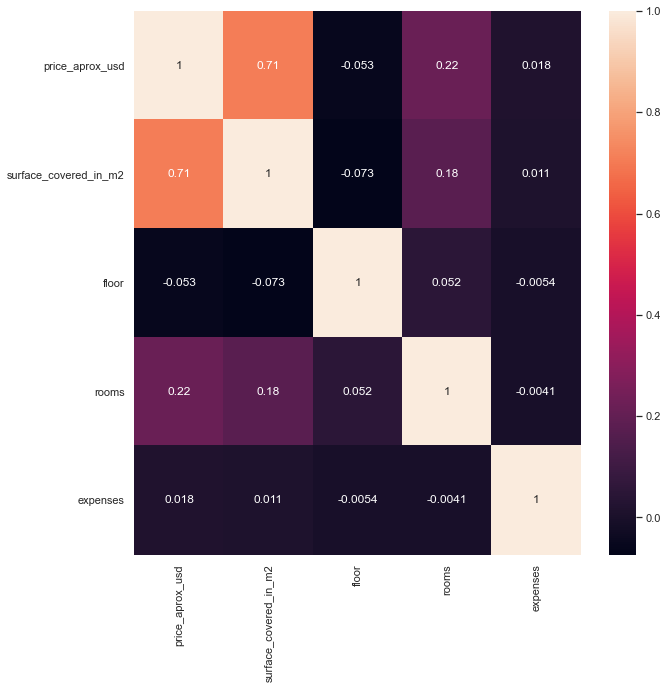

In [23]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_saopaulo_no_lat.corr(),annot=True)

In [24]:
df_saopaulo_no_lat= df_saopaulo_no_lat.drop(["description", "title","created_on"], axis=1)

In [25]:
df_saopaulo_no_lat = pd.get_dummies(df_saopaulo_no_lat, columns=['property_type'])

In [26]:
df_saopaulo_no_lat_dummy = pd.get_dummies(df_saopaulo_no_lat, columns=['neighbourhood'])

In [27]:
df_saopaulo_no_lat.head()

price_aprox_usd  surface_covered_in_m2  floor  rooms  expenses  \
794        631273.27                  180.0   12.0    3.0       0.0   
795        303011.17                  109.0    1.0    3.0       0.0   
796        410327.63                  130.0   11.0    3.0       0.0   
797        331418.47                  145.0    2.0    3.0       0.0   
798        378763.96                  218.0    0.0    2.0       0.0   

    neighbourhood  property_type_PH  property_type_apartment  \
794  Higienópolis                 0                        1   
795  Higienópolis                 0                        1   
796  Higienópolis                 0                        1   
797      Perdizes                 0                        1   
798      Perdizes                 0                        0   

     property_type_house  property_type_store  
794                    0                    0  
795                    0                    0  
796                    0                    0  
797                    0                    0  
798                    1                    0

## X e Y de entrenamiento y test para regresión lineal

In [28]:
#'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor


X = df_saopaulo_no_lat_dummy[df_saopaulo_no_lat_dummy.columns.difference(['price_aprox_usd'])]

y = df_saopaulo_no_lat_dummy['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from xgboost import XGBRegressor

n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(X)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(X)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [30]:
lm = LinearRegression()

lm.fit(X_train,y_train)

'''Get Predictions & Print Metrics'''

y_train_lm = lm.predict(X_train)
y_pred_lm = lm.predict(X_test)

In [31]:
lm_CV= -rmse_cv(lm)

lm_results = pd.DataFrame({'algorithm':['Linear Regression'],
            'CV error': lm_CV.mean(), 
            'CV std': lm_CV.std(),
            'training error': [mean_squared_error(y_train, y_train_lm)],
            'test error': [mean_squared_error(y_test, y_pred_lm)],
            'training_r2_score': [r2_score(y_train, y_train_lm)],
            'test_r2_score': [r2_score(y_test, y_pred_lm)]})
lm_results

algorithm      CV error        CV std  training error  \
0  Linear Regression  1.009602e+10  1.863563e+08    1.001261e+10   

     test error  training_r2_score  test_r2_score  
0  1.013833e+10           0.736655        0.73635

## Random Forest

Primero, para mejorar la agilidad de computación, las variables dummies de barrios se quitan, y en vez se hace un ranking dependiendo del precio medio de cada uno de los barrios, y de esta forma tener solo una columna. Más impreciso pero mejorando considerablemente el tiempo de procesado al usar árboles.

In [32]:
df_saopaulo_no_lat_nei = df_saopaulo_no_lat.groupby("neighbourhood").mean().sort_values("price_aprox_usd")   

list_nei_sorted = []

for i in df_saopaulo_no_lat_nei.index:
    list_nei_sorted.append(i)    
    
list_nei_num = list(range(0, len(list_nei_sorted)))

dicc=dict(zip(list_nei_sorted, list_nei_num))

for x, y in dicc.items():
    df_saopaulo_no_lat['neighbourhood']=df_saopaulo_no_lat['neighbourhood'].replace(to_replace=x, value=y)
    


In [33]:
X = df_saopaulo_no_lat[df_saopaulo_no_lat.columns.difference(['price_aprox_usd'])]

y = df_saopaulo_no_lat['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [34]:
rfr_CV_baseline = -rmse_cv(RandomForestRegressor(random_state=42))
rfr_baseline = RandomForestRegressor(random_state=42)
rfr_baseline.fit(X_train, y_train) 
y_train_rfr = rfr_baseline.predict(X_train)
y_test_rfr = rfr_baseline.predict(X_test)
rfr_baseline_results = pd.DataFrame({'algorithm':['Random Forest Regressor [baseline]'],
            'CV error': rfr_CV_baseline.mean(), 
            'CV std': rfr_CV_baseline.std(),
            'training error': [mean_squared_error(y_train_rfr, y_train)],
            'test error': [mean_squared_error(y_test_rfr, y_test)]})

In [35]:
import eli5

eli5.show_weights(rfr_baseline, feature_names=list(X.columns))

C:\Users\crise\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\crise\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [36]:
rf = RandomForestRegressor(random_state=42)
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [37]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 15.1min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [38]:
best_random = rf_random.best_estimator_

In [39]:
rfr_CV_best = -rmse_cv(best_random)
best_random.fit(X_train, y_train) 
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

algorithm      CV error        CV std  training error  \
0  Random Forest Regressor  5.862760e+09  1.126650e+08    2.575151e+09   

     test error  training_r2_score  test_r2_score  
0  5.912975e+09            0.93227       0.846231

## XGBoost

In [40]:
import xgboost

#train XGBoost model
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.01, gamma=0, subsample=0.33,
                           colsample_bytree=1, max_depth=10)

xbgreg_CV_best = -rmse_cv(xgb)
xgb.fit(X_train,y_train)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)


In [41]:
xgb_results = pd.DataFrame({'algorithm':['XGBoost'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_preds)],
            'test error': [mean_squared_error(y_test, y_test_preds)],
            'training_r2_score': [r2_score(y_train, y_train_preds)],
            'test_r2_score': [r2_score(y_test, y_test_preds)]})
xgb_results

algorithm      CV error        CV std  training error    test error  \
0   XGBoost  6.081523e+09  1.034349e+08    4.777608e+09  6.149966e+09   

   training_r2_score  test_r2_score  
0           0.874343       0.840068

## Mejor modelo

In [42]:
pd.concat([lm_results, rfr_best_results, xgb_results], axis=0, ignore_index=True)

algorithm      CV error        CV std  training error  \
0        Linear Regression  1.009602e+10  1.863563e+08    1.001261e+10   
1  Random Forest Regressor  5.862760e+09  1.126650e+08    2.575151e+09   
2                  XGBoost  6.081523e+09  1.034349e+08    4.777608e+09   

     test error  training_r2_score  test_r2_score  
0  1.013833e+10           0.736655       0.736350  
1  5.912975e+09           0.932270       0.846231  
2  6.149966e+09           0.874343       0.840068

Nos quedamos con Random Forest Regressor debido a que tiene un mejor R2 además de un menor error. El R2 es de 0.846, que está bastante bien considerando que no hay variables con características específicas que puedan diferenciar más los inmuebles.

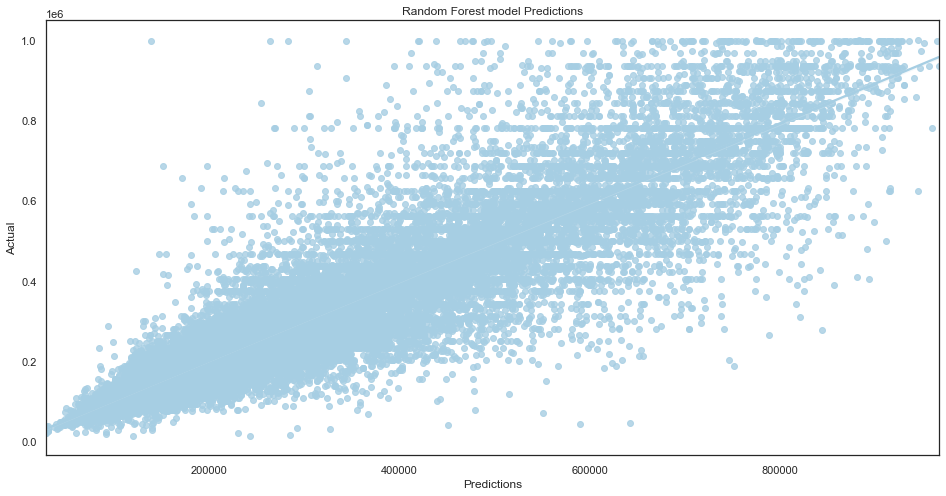

In [45]:
import plotly.graph_objects as go
sns.set(style="white", palette="Paired", color_codes=True)    

error_rfr = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_test_rfr.flatten()}).head(20)

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_rfr.index, y=error_rfr['Predicted Values']),
    go.Bar(name='Actual', x=error_rfr.index, y=error_rfr['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

plt.figure(figsize=(16,8))
sns.regplot(y_test_rfr,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Random Forest model Predictions")
plt.show()

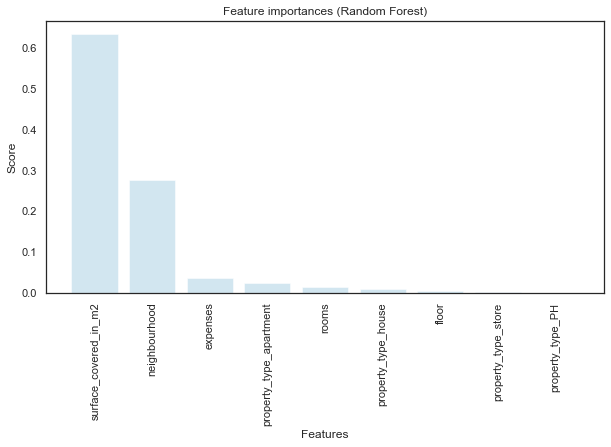

In [46]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, best_random.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

 
plt.show()

In [47]:
error = pd.DataFrame({'Predicted Values': y_test_rfr.flatten()}, index=y_test.index)

In [48]:
resultados = pd.concat([y_test, error], axis=1)
resultados["margen"] = resultados["Predicted Values"] - resultados["price_aprox_usd"] 
resultados = resultados[resultados["margen"] > 0]
resultados = resultados.sort_values(by="margen", ascending=False)
print("Hay un total de ", len(resultados), "registros en los cuales el valor predicho es menor que el valor de mercado")


Hay un total de  20073 registros en los cuales el valor predicho es menor que el valor de mercado


Por lo tanto se podría empezar con los que mayor margen den. Para identificar los valores se usa el index.

In [49]:
resultados.head(20)

price_aprox_usd  Predicted Values         margen
777681         46807.71     642175.319510  595367.609510
688019        277725.76     843520.239909  565794.479909
824485        187230.85     751683.955836  564453.105836
721143         43687.19     589098.394018  545411.204018
600284        202833.42     746101.910628  543268.490628
645357        265243.71     788195.570046  522951.860046
790998        310491.16     820288.181858  509797.021858
559639        405666.85     893031.870865  487365.020865
755175         71771.82     551202.296187  479430.476187
725082        343256.56     816161.167329  472904.607329
579053        410327.63     880314.035053  469986.405053
794222        390064.28     856526.416784  466462.136784
316284        280846.28     741288.327540  460442.047540
645353        374461.71     824451.891250  449990.181250
568030        213755.22     655223.461622  441468.241622
808157        187230.85     627599.335197  440368.485197
775118        212194.96     651021.335460  438826.375460
808158        182550.08     614308.891838  431758.811838
805663        202833.42     633396.232798  430562.812798
645612        196592.39     623646.972889  427054.582889

In [61]:
indice = resultados.index
df_final = df_saopaulo.loc[(indice)]
df_final = pd.concat([df_final, resultados], axis=1)
df_final.head()

created_on operation property_type        place_name  \
777681  2016-09-20      sell         store     Vila Madalena   
688019  2016-07-28      sell         house         Aclimação   
824485  2016-10-09      sell         store   Jardim Paulista   
721143  2016-08-17      sell         store        Itaim Bibi   
600284  2016-06-15      sell         store  Jardim da Glória   

                        lat-lon        lat        lon price_aprox_usd  \
777681                      NaN        NaN        NaN        46807.71   
688019  -23.5738058,-46.6347429 -23.573806 -46.634743       277725.76   
824485                      NaN        NaN        NaN       187230.85   
721143                      NaN        NaN        NaN        43687.19   
600284                      NaN        NaN        NaN       202833.42   

        surface_total_in_m2  surface_covered_in_m2  ...  \
777681                  NaN                  247.0  ...   
688019                  NaN                  400.0  ...   
824485                  NaN                  400.0  ...   
721143                  NaN                  120.0  ...   
600284                  NaN                  336.0  ...   

                                            properati_url  \
777681  http://vila-madalena.properati.com.br/2d7xl_ve...   
688019  http://aclimacao.properati.com.br/2a31j_venda_...   
824485  http://jardim-paulista-sao-paulo.properati.com...   
721143  http://itaim-bibi.properati.com.br/2bbu5_venda...   
600284  http://jardim-da-gloria-sao-paulo.properati.co...   

                                              description  \
777681  O estacionamento está localizado em importante...   
688019  Sobrado na Aclimação com possui 3 dormitórios ...   
824485  Restaurante todo equipado em excelente localiz...   
721143  Cervejaria bem localizada, no bairro do Itaim ...   
600284  No Piso Superior Está O Imovel C/ Opção De 3 D...   

                                                    title  country   province  \
777681  Estacionamento 4000 líquido, somente AVULSO - ...   Brasil  São Paulo   
688019  Casa com 3 quartos e Terraco, São Paulo, Aclim...   Brasil  São Paulo   
824485  RESTAURANTE TODO EQUIPADO A 2 QUADRAS DA PAULISTA   Brasil  São Paulo   
721143    Ponto comercial à venda, Itaim Bibi, São Paulo.   Brasil  São Paulo   
600284  Comercial com Vagas, São Paulo, Jardim da Glór...   Brasil  São Paulo   

             city     neighbourhood price_aprox_usd Predicted Values  \
777681  São Paulo     Vila Madalena        46807.71    642175.319510   
688019  São Paulo         Aclimação       277725.76    843520.239909   
824485  São Paulo   Jardim Paulista       187230.85    751683.955836   
721143  São Paulo        Itaim Bibi        43687.19    589098.394018   
600284  São Paulo  Jardim da Glória       202833.42    746101.910628   

               margen  
777681  595367.609510  
688019  565794.479909  
824485  564453.105836  
721143  545411.204018  
600284  543268.490628  

[5 rows x 24 columns]

In [62]:
t